#**KHELAN SHAH**
### **LETSGROWMORE INTERNSHIP**
### **TASK 4**
### **Stock Prices Prediction**

**Importing the Libraries**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df=pd.read_csv("NSE-TATAGLOBAL.csv")

In [71]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [72]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [73]:
df1=df.reset_index()['Close']

In [74]:
df1.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

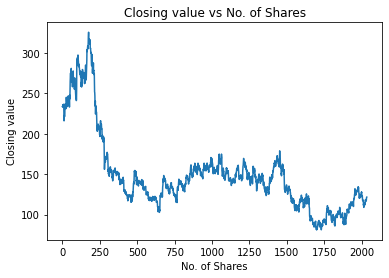

In [75]:
df1.plot(x= "Close")
plt.xlabel("No. of Shares")
plt.ylabel("Closing value")
plt.title("Closing value vs No. of Shares")
plt.show()

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [77]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [78]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [79]:
training_size,test_size

(1322, 713)

In [80]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [81]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [82]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [83]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [84]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [85]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [87]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
20/20 [==============================] - 9s 240ms/step - loss: 0.0308 - val_loss: 0.0042
Epoch 2/10
20/20 [==============================] - 4s 184ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 3/10
20/20 [==============================] - 4s 186ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 4/10
20/20 [==============================] - 4s 186ms/step - loss: 0.0018 - val_loss: 9.9115e-04
Epoch 5/10
20/20 [==============================] - 4s 185ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 6/10
20/20 [==============================] - 4s 182ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 7/10
20/20 [==============================] - 4s 182ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/10
20/20 [==============================] - 4s 182ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 9/10
20/20 [==============================] - 4s 181ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/10
20/20 [==============================] - 4s 185ms/step - loss: 0.0013 - val_loss: 0.

In [90]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [91]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

166.13374309000324

In [92]:
math.sqrt(mean_squared_error(ytest,test_predict))

119.66718605611351

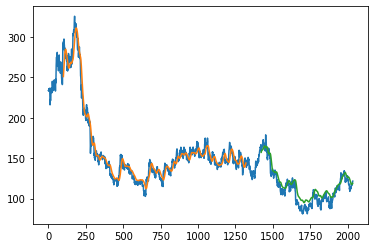

In [93]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



*   Green indicates the Predicted Data
*   Blue indicates the Complete Data
*   Orange indicates the Train Data











